In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def clean_data(train_data, test_data):
    #To do: clean the dataset
    
    #  A) Replace '?' in workclass and occupation with unemployed, replace '?' in native.country with 'Unlisted'
    train_data[['workclass', 'occupation']] = train_data[['workclass', 'occupation']].replace('?', 'Unemployed')
    test_data[['workclass', 'occupation']] = test_data[['workclass', 'occupation']].replace('?', 'Unemployed')
    train_data[['native.country']] = train_data[['native.country']].replace('?','Unlisted')
    test_data[['native.country']] = test_data[['native.country']].replace('?','Unlisted')
    
    #  B) Known Outliers, 99_999 in capital gain column, 99 in hours per week
    # Based on standard practice in reading material im going to replace these outliers with the mean of their respective columns
    # Fix Capital Gain
    median_capital_gain = train_data.loc[train_data['capital.gain'] != 99999, 'capital.gain'].median()
    train_data['capital.gain'] = train_data['capital.gain'].replace(99999, median_capital_gain)
    median_capital_gain_test = test_data.loc[test_data['capital.gain'] != 99999, 'capital.gain'].median()
    test_data['capital.gain'] = test_data['capital.gain'].replace(99999, median_capital_gain_test)    
    
    # Fix hours per week
    
    median_hours_perweek = train_data.loc[train_data['hours.per.week'] != 99, 'hours.per.week'].median()
    train_data['hours.per.week'] = train_data['hours.per.week'].replace(99, median_hours_perweek)
    median_hours_perweek_test = test_data.loc[test_data['hours.per.week'] != 99, 'hours.per.week'].median()
    test_data['hours.per.week'] = test_data['hours.per.week'].replace(99, median_hours_perweek_test)
    
    #  C) Drop Columns, education.num and fnlwwgt
    
    train_data = train_data.drop(columns= ['education.num','fnlwgt'])
    test_data = test_data.drop(columns= ['education.num','fnlwgt'])
    
    #  D)
    
    # Replace race values with 'Other'
    train_data['race'] = train_data['race'].replace( ['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other')
    test_data['race'] = test_data['race'].replace( ['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other')
    # Replace specific education values with 'School'
    train_data['education'] = train_data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],'School')
    test_data['education'] = test_data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],'School')
    
    #  E)
    
    # Replace income values with binary values
    train_data['income'] = train_data['income'].replace('>50K','1')
    train_data['income'] = train_data['income'].replace('<=50K','0')
    test_data['income'] = test_data['income'].replace('>50K','1')
    test_data['income'] = test_data['income'].replace('<=50K','0')
    
    #  F)
    train_data.to_csv('cleaned_train_data.csv', index=False)
    test_data.to_csv('cleaned_test_data.csv', index=False)
    return 

In [102]:
def plot_numeric_feature_correlation(train_data):
    
    correlation_matrix = train_data[['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']].corr()
    
    plt.figure(figsize=(10, 8))
    
    sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cbar=True, cmap = 'PiYG' )
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()
    return

In [128]:
def plot_histogram(train_data):

    columns_to_plot = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', "education"]

    for column in columns_to_plot:
        plt.figure(figsize=(8, 6))
        
        sns.histplot(data=train_data, x=column, hue="income", multiple="dodge", bins=20, kde=False, palette=["blue", "orange"], stat="count")
        
        plt.title(f'Histogram of {column} by Income')
        plt.xlabel(column)
        plt.ylabel('Number of Samples')
        plt.xticks(rotation=45)
        plt.legend(title="Income", labels=["<=50K", ">50K"])
        plt.show()
    return

In [129]:
# Load data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [130]:
clean_data(train_data, test_data)

In [131]:
# Load in Cleaned Data
clean_train_data = pd.read_csv('cleaned_train_data.csv')
clean_test_data = pd.read_csv('cleaned_test_data.csv')

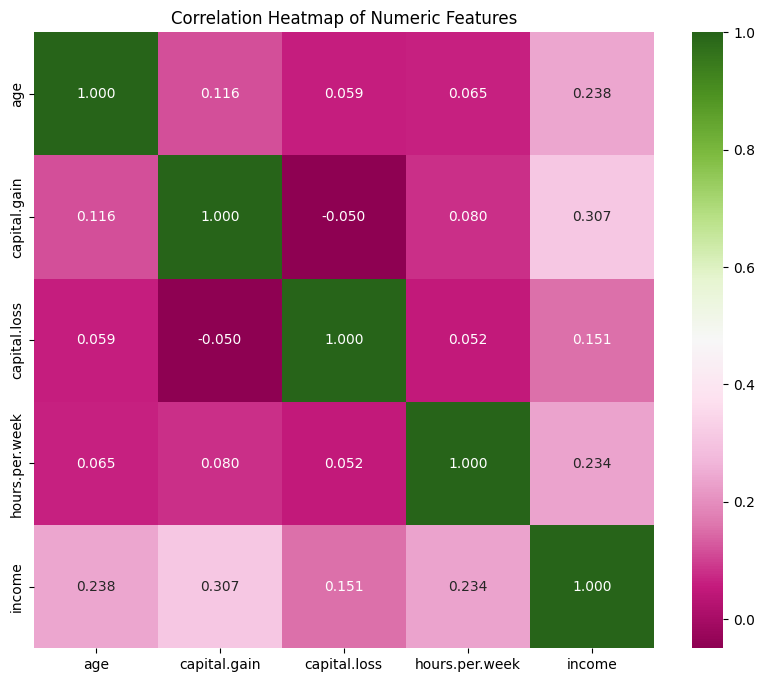

In [132]:
plot_numeric_feature_correlation(clean_train_data)

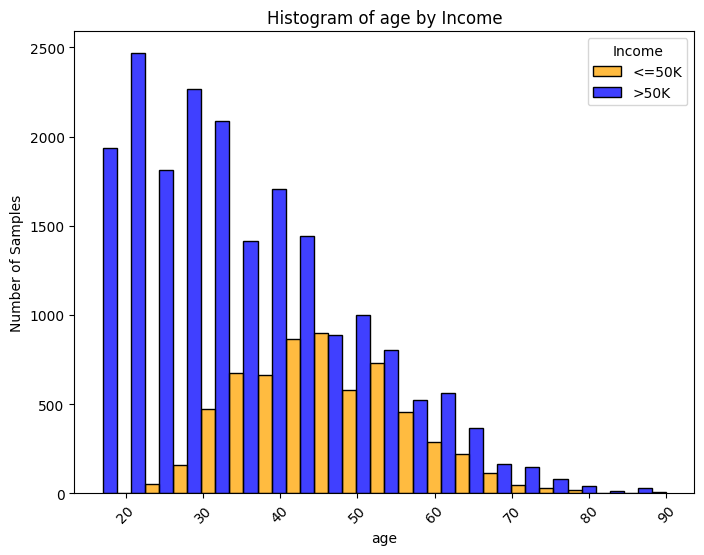

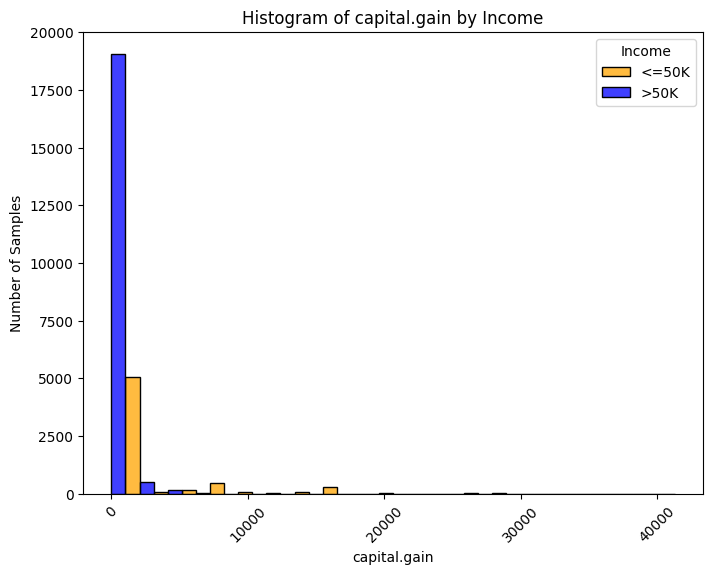

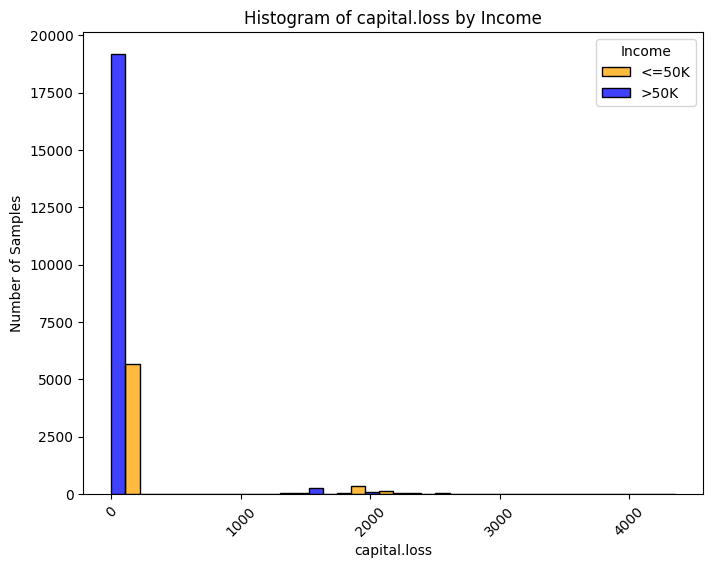

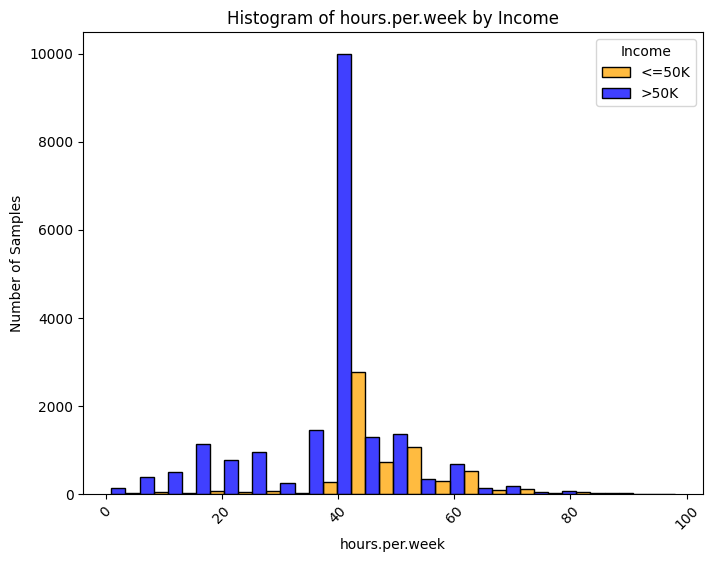

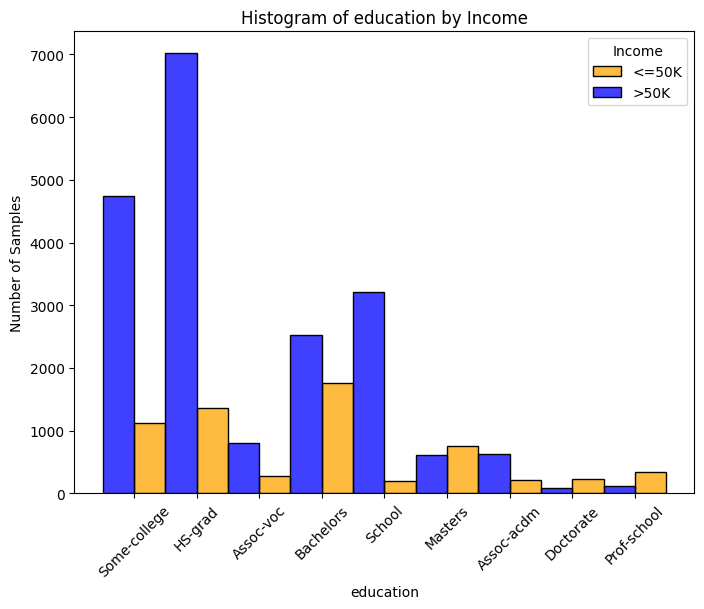

In [133]:
plot_histogram(clean_train_data)